<a href="https://colab.research.google.com/github/LOWERCAS3/PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Resource Notebook: https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
workflow =  {1: "data (prepare and load)",
            2: "build model",
            3: "fittting the model to data (training)",
            4: "making predictions and evaluation a model (inference)",
            5: "saving and loading a model",
            6: "putting it all together"}
workflow

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fittting the model to data (training)',
 4: 'making predictions and evaluation a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

## 1. Data (preparing and loading)

---
Data can be of any form....

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has a lots of data....)
* Audio (songs and podcasts)
* DNA
* Text

Machine learning 2 main concepts:
1. Get data into numerical representation in order to perform operations.
2. Build a model to learn patterns in that numerical representation.


In [3]:
# Create *known* paramaters
weight = 0.7
bias = 0.3

# Create tensors
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [5]:
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [6]:
len(X), len(y)

(50, 50)

###Splitting data into training  and test sets (one of the most important concepts in machine learning in general)

Datasets
1. **Training set** :- Model learns patterns from here.
2. **Validation set** :- This set is used to tune patters to match the desired outcomes.
3. **Test set** :- This set is used to test out machine learning model to check performance and see if it is ready for real world 

In [7]:
# Splitting data into training  and testing sets
train_split = int(0.8 * len(X))

# Training set
X_train , y_train = X[:train_split], y[:train_split]

# Test set
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot testing data in red
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there any predictions
    if predictions is not None:
        # Plot predictions
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show legends
    plt.legend(prop={"size": 14});

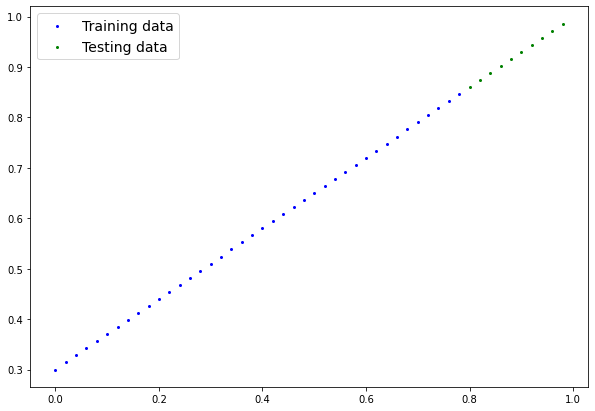

In [9]:
plot_predictions()

## Building model
### Machine learning model using NN

*   nn.Module is used to import nn modules.
*   OOPS concepts for python: https://realpython.com/learning-paths/object-oriented-programming-oop-python/

What our model does?

*  Strat with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used in to create the data). 

How does it do so?

Through two main algorithms:
1. Gradient descent.
2. Backpropagation



In [10]:
# Create linear regression class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is inherited from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn( 1, 
                                                requires_grad=True, 
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, 
                                             requires_grad=True, 
                                             dtype=torch.float))
        
    # Forward medthod to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # Equation of linear regression, weights and biases will be adjusted to predict correct label.

### Pytorch model building essentials

* torch.nn - contains all of the building for computational graphs (a neural netwoks can be considered a computational graph).
* torch.nn.Parameter - what parameter should our model try and learn, often a PyTorch layer from troch.nn will set these for us.
* torch.nn.Module - The base class for all neural networks modules, if you subclass it, you should overwrite forward().
* torch.optim - This where the optimizers in PyTorch live, they will help with gradient descent.
* def.forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

Cheat Sheet: https://pytorch.org/tutorials/beginner/ptcheat.html

In [11]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of PyTorch Model (This will be a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check model's predective power, let's see how well our model predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the forward() method. 


In [13]:
# Make predictions with PyTorch model_0
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

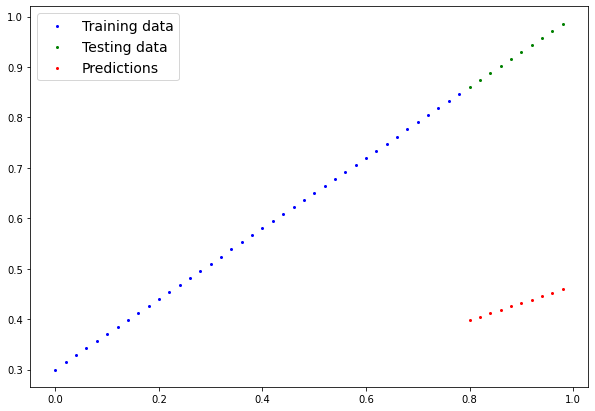

In [14]:
# Comparing the predictions with actual y_test values through visualizations using plot_predictions function
plot_predictions(predictions=y_preds)

## 3. Train Model
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters (towards better representation of data).

One way to measure how poor or how wrong your models predections are is by using a loss function

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predections are to the ideal outputs(lower the value better).

Doc- https://pytorch.org/docs/stable/nn.html#loss-functions
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to impove the loss function.

Doc- https://pytorch.org/docs/stable/optim.html

And specifically for PyTorch, we need:

* A training loop
* A testing loop


In [15]:
print(f"Parameter List : \n{list(model_0.parameters())}")
print(f"\n---------------------\nName of parameters: \n{model_0.state_dict()}")

Parameter List : 
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]

---------------------
Name of parameters: 
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [16]:
# Setup a loss function (MAE - Mean absolute error )
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer  = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.01) # lr = learning rate  = possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch
Steps to define and implement training loop
0. Loop through data and do....
1. Do a forward pass (this involves data moving through our model `forward()` funciton) to make to make padictions on the propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward -  move backwards through the network to calculate the gradient of each of the parameters of our model with respect to loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [17]:
torch.manual_seed(42)
# An epoch is one loop through the data... (this is a hyperparamenter)
epochs = 200

# Tracking
epoch_count = []
loss_values = []
test_loss_values = []

# Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that requires gradients to require gradients 

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next interation of the loop
    
    # Testing
    model_0.eval() # turns off different setting in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & a couple of more things behind the scenes.
        # 1. Forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Printing progress - 1
    if epoch % 20 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(f"Parameters: {model_0.state_dict()}")

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Parameters: OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Parameters: OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Parameters: OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Parameters: OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Parameters: OrderedDict([('weights', tensor([0.5459])), ('bias', tensor([0.3648]))])
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Parameters: OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.040604822

In [18]:
# Matplotlib works with numpy hence the loss_values tensors needs to be converted into ndarray
import numpy as np
# torch.tensor(loss_values)
np.array(torch.tensor(loss_values, dtype=torch.float64).numpy())

array([0.31288138, 0.08908726, 0.04543797, 0.03818933, 0.03132383,
       0.02445896, 0.01758547, 0.01071659, 0.00385178, 0.00893248])

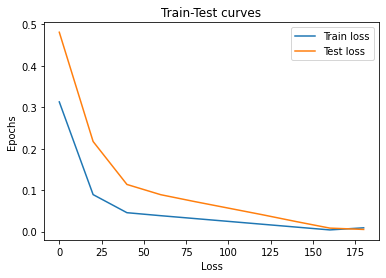

In [19]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values, dtype=torch.float64).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Train-Test curves")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend();

In [20]:
# Creating new predictions
with torch.inference_mode():
    y_preds_new = model_0(X_test)

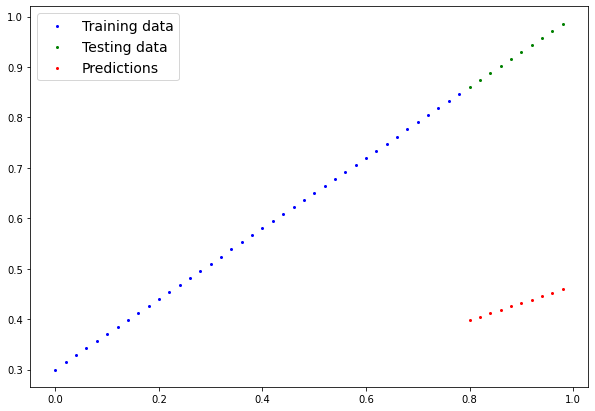

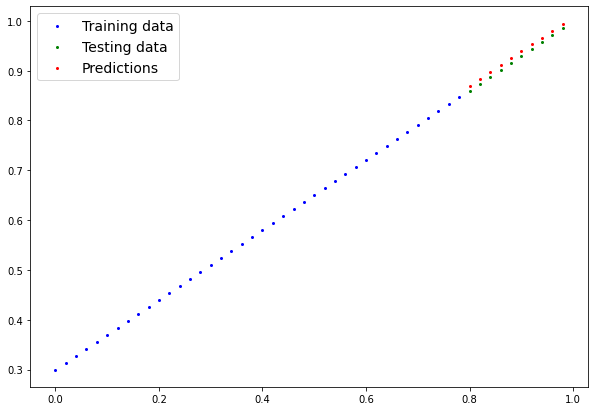

In [21]:
# Plotting old prediction and new predictions
plot_predictions(predictions=y_preds)
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch
1. `torch.save()` - saves the PyTorch object in Python's pickle format.
2. `torch.laod()` - loads a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - loads models's saved state.

PyTorch load and save doc: https://pytorch.org/tutorials/beginner/saving_loading_models.html 

In [22]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("/content/drive/MyDrive/PyTorchModels")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model save dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: /content/drive/MyDrive/PyTorchModels/01_pytorch_workflow_model_0.pth


In [23]:
!ls -l /content/drive/MyDrive/PyTorchModels

total 2
-rw------- 1 root root 1063 Oct  4 16:27 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model
 Since we saved our models in `state.dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state.dict()` into that.


In [24]:
# To load a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of our model_0 (this will update the new instance with updated parameters)
print(f"State dict of new instance: {loaded_model_0.state_dict()}")
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(f"State dict after being loaded into instance: {loaded_model_0.state_dict()}")

State dict of new instance: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
State dict after being loaded into instance: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [25]:
# Make some predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [26]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
# Compare predictions
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting everthing together
Reiterating all the above steps

In [28]:
# Importing PyTorch and matloplib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

### Create device agnostic code
This means if GPU there use it !!

In [29]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available else 'cpu'
print(f"Using device: {device}")

Using device: cuda


### 1. Data


In [30]:
# Create some data using linear regression formula y = mx + c
weight = 0.7
bias = 0.3

# Create range values
start, end, step = 0, 1, 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # <- Since we are using vector unsqueeze is used so that we will not get dimensions error in later stages
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [31]:
# Splitting the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

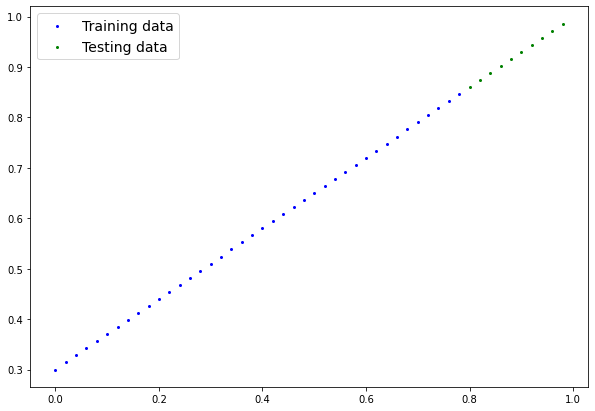

In [32]:
# Plotting the data
# Note: plot_predictions func will be used
plot_predictions(X_train, y_train, X_test, y_test)

### 2. Building a PyTorch Linear Model

In [33]:
# Create a Linear Model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [34]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [35]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 3. Training
 
 For training we need:
 * Loss Funtion
 * Optimizer
 * Training loop
 * Testing loop

In [36]:
# Set up loss function
loss = nn.L1Loss()

# Setting up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [37]:
# Training loop
torch.manual_seed(42)

epochs = 200

# Put data on same device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward Pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Printing results
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} ")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089 
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411 
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085 
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704 
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009 
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033 
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255 
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015 
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409 
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703 
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249 
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866 
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882 
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.01

In [38]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [39]:
weight, bias

(0.7, 0.3)

### 4 Make predictions and plot them

In [40]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

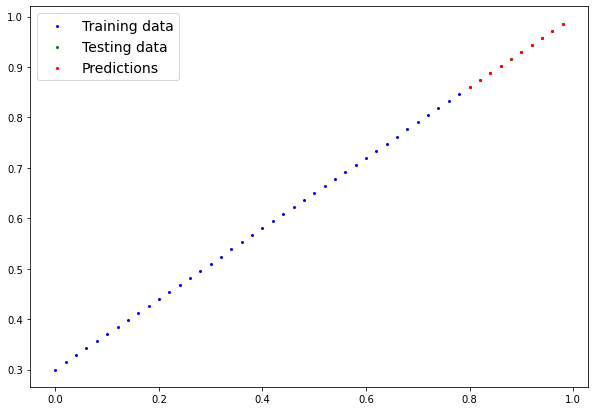

In [41]:
# Visualizing the predictions
plot_predictions(predictions=y_preds.cpu())

### 5. Saving and loading a trained model

In [43]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("/content/drive/MyDrive/PyTorchModels")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: /content/drive/MyDrive/PyTorchModels/01_pytorch_workflow_model_1.pth


In [45]:
# Load the PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [46]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [47]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [49]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = model_1(X_test)

loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')